# Import library

In [2]:
%matplotlib notebook

# Import libraries
from obspy.clients.fdsn import Client
from obspy import Stream, UTCDateTime, Trace, read
from obspy.core import Trace, AttribDict
import numpy as np
import matplotlib.pyplot as plt

# Specify what we are looking for
* The example here is to download the data of Station ADHE. ADHE is the station name; 3C is its network. 
* It is IMPORTANT to give the correct CLIENT name. 
* Choose a start time and duration.

A good reference to verify the above infos: RESIF and IRIS.
* https://seismology.resif.fr/
* https://www.iris.edu/hq/


In [5]:
# main shock Le Teil event
maintime = '2019-11-11T10:52:45'

# duration
dur = 60.0

net = '3C'
sta = 'ADHE'
client = Client('RESIF')

loc ='*'
compo = 'HH?' #just an example here


# Search and download

In [11]:
st_main = Stream()
stats = []

###
evtime = maintime
starttime = UTCDateTime(evtime)
endtime = starttime+ dur
_st = client.get_waveforms(net, sta, loc, compo, starttime, endtime, attach_response=True)
_st.merge(method=1)
st_main += _st

In [13]:
print(st_main)

3 Trace(s) in Stream:
3C.ADHE.00.HHE | 2019-11-11T10:52:45.000000Z - 2019-11-11T10:53:45.000000Z | 200.0 Hz, 12001 samples
3C.ADHE.00.HHN | 2019-11-11T10:52:45.000000Z - 2019-11-11T10:53:45.000000Z | 200.0 Hz, 12001 samples
3C.ADHE.00.HHZ | 2019-11-11T10:52:45.000000Z - 2019-11-11T10:53:45.000000Z | 200.0 Hz, 12001 samples


# Quick checks of data content

<IPython.core.display.Javascript object>


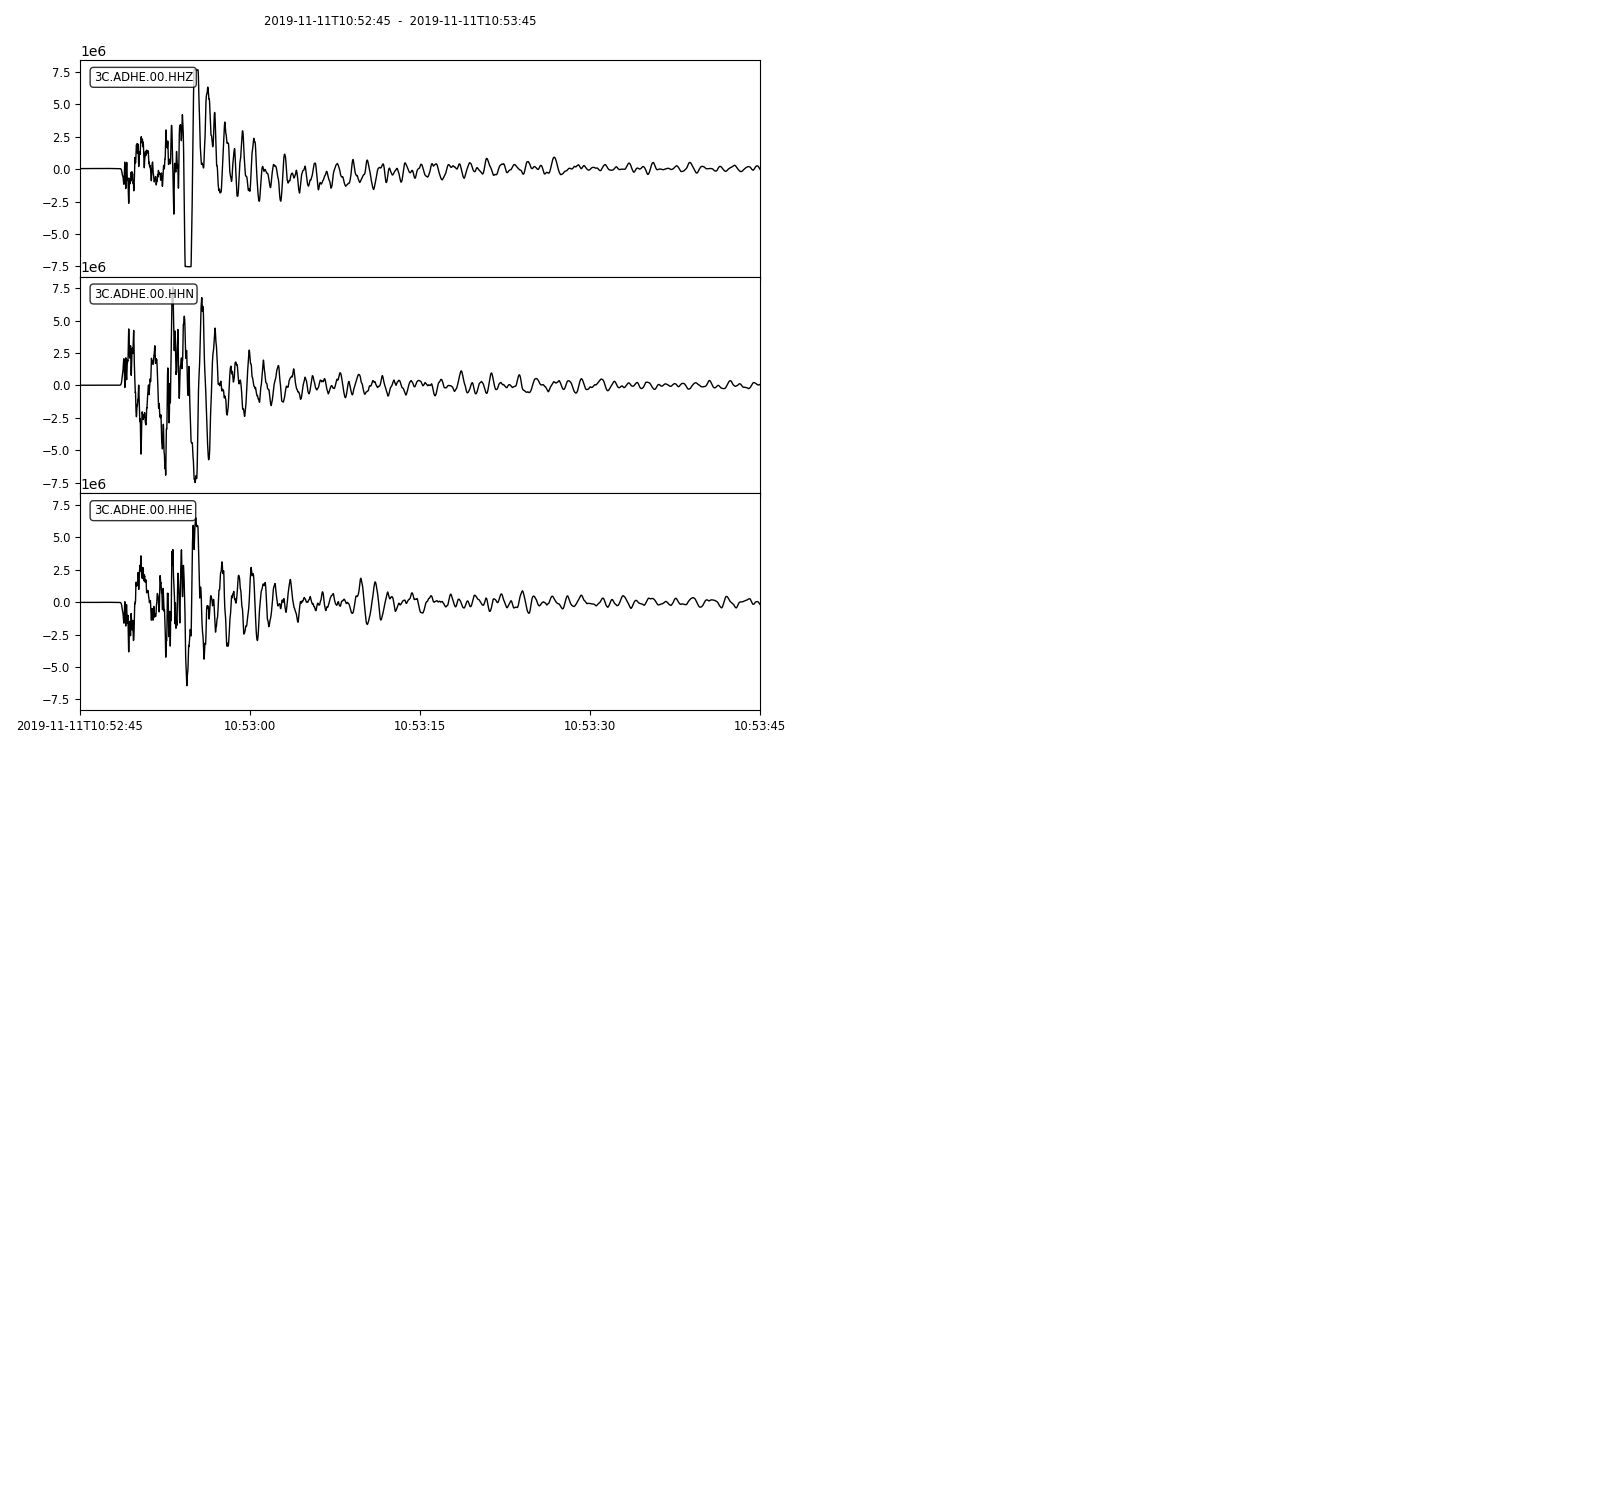

<IPython.core.display.Javascript object>


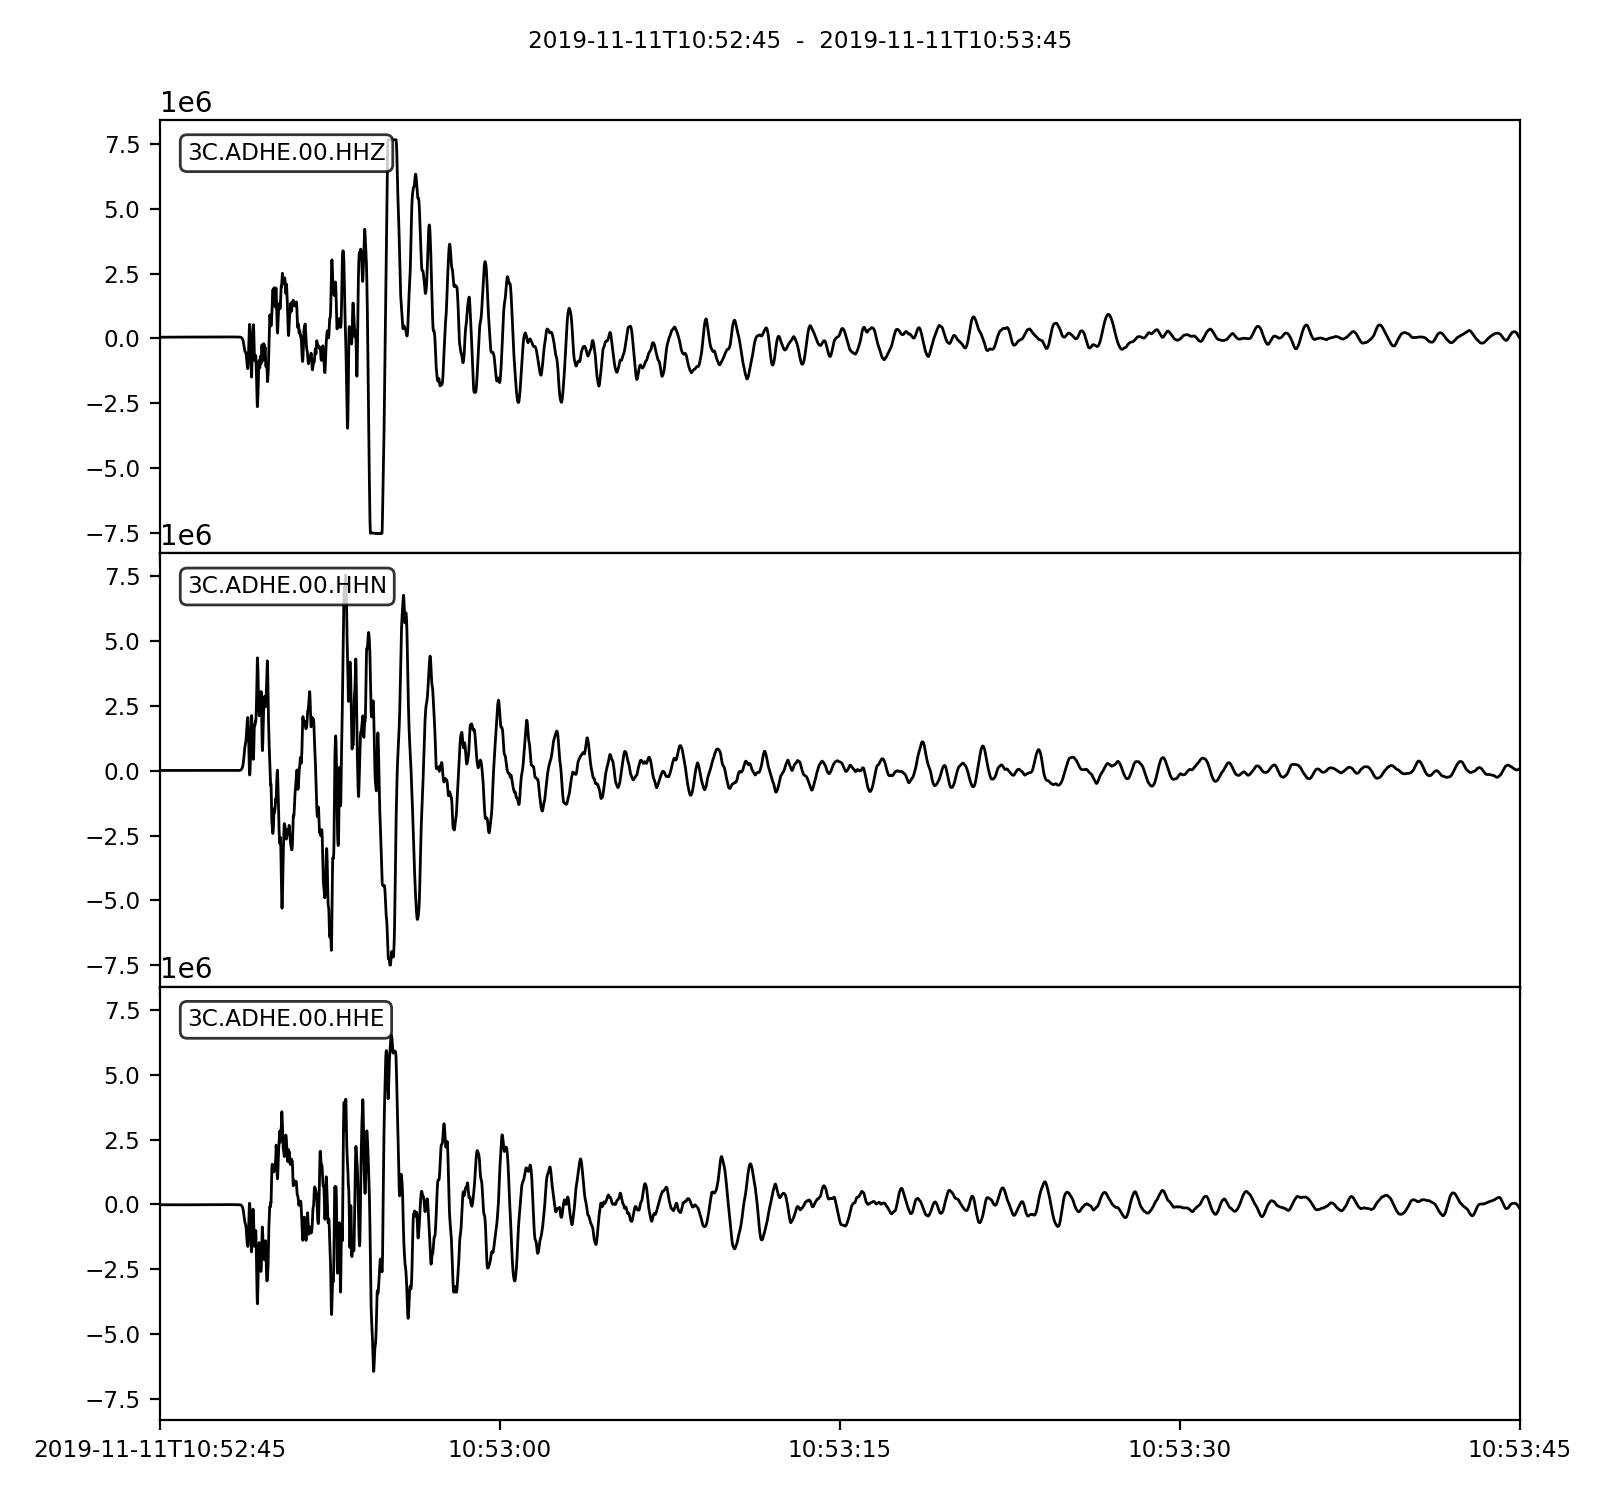

In [18]:
st_main.plot()

<IPython.core.display.Javascript object>


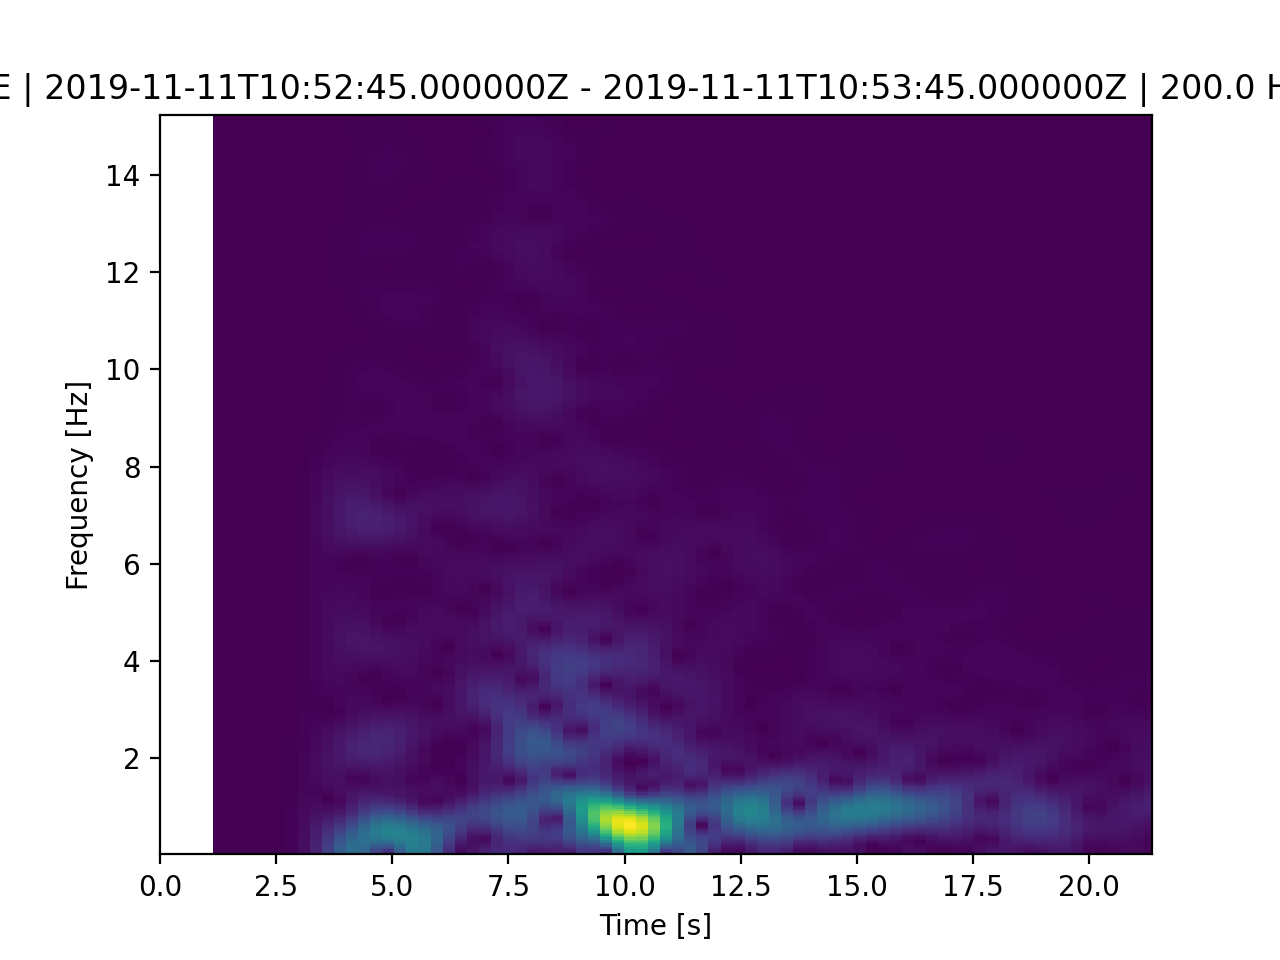

In [19]:
st_main[0].spectrogram()